In [2]:
#Get Data
!wget http://www.kasprowski.pl/datasets/signs.zip
!wget http://www.kasprowski.pl/datasets/signs_labels.csv

--2024-01-26 07:46:09--  http://www.kasprowski.pl/datasets/signs.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186917768 (178M) [application/zip]
Saving to: ‘signs.zip.1’

signs.zip.1         100%[===================>] 178.26M  2.98MB/s    in 2m 4s   

2024-01-26 07:48:13 (1.44 MB/s) - ‘signs.zip.1’ saved [186917768/186917768]

--2024-01-26 07:48:13--  http://www.kasprowski.pl/datasets/signs_labels.csv
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1041 (1.0K) [text/csv]
Saving to: ‘signs_labels.csv’

signs_labels.csv    100%[===================>]   1.02K  --.-KB/s    in 0s      

2024-01-26 07:48:13 (130 MB/s) - ‘signs_labels.csv’ saved [1041/1041]



In [47]:
#Unzip Directory
!unzip signs.zip


Archive:  signs.zip
replace signs/00000/00000_00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import glob
import cv2
from sklearn.preprocessing import LabelBinarizer
import random
import sklearn.model_selection
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from skimage import io

In [41]:
#Create Images and Labels
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
      #for inner_class_dir in os.listdir(indir+'/' + class_dir):
        # print(inner_class_dir)
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        #print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
          if(not file.startswith('GT')):
            #image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            #print(indir,class_dir,file)
            image = io.imread("{}/{}/{}".format(indir,class_dir,file))
            #image = cv2.resize(image, (64,64))
            #image = io.imread(image)
            print(indir,class_dir,file)
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels


# samples, labels = load_img('signs')
# print('loaded',len(samples),' signs_labels')
# print('classes',set(labels))
# org_samples = samples
# org_labels = labels

samples, labels = load_img('signs')
print('loaded',len(samples),'signs_labels')
print('classes',set(labels))
org_samples = samples

Dlabels = labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

org_labels = labels

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
signs 00008 00027_00007.ppm
signs 00008 00004_00001.ppm
signs 00008 00011_00017.ppm
signs 00008 00026_00012.ppm
signs 00008 00027_00004.ppm
signs 00008 00002_00027.ppm
signs 00008 00023_00012.ppm
signs 00008 00023_00020.ppm
signs 00008 00004_00008.ppm
signs 00008 00014_00017.ppm
signs 00008 00026_00019.ppm
signs 00008 00021_00027.ppm
signs 00008 00031_00015.ppm
signs 00008 00008_00011.ppm
signs 00008 00001_00013.ppm
signs 00008 00003_00007.ppm
signs 00008 00030_00015.ppm
signs 00008 00016_00027.ppm
signs 00008 00006_00001.ppm
signs 00008 00006_00019.ppm
signs 00008 00014_00012.ppm
signs 00008 00011_00013.ppm
signs 00008 00021_00011.ppm
signs 00008 00004_00018.ppm
signs 00008 00005_00025.ppm
signs 00008 00013_00019.ppm
signs 00008 00027_00014.ppm
signs 00008 00002_00024.ppm
signs 00008 00004_00011.ppm
signs 00008 00030_00005.ppm
signs 00008 00018_00002.ppm
signs 00008 00026_00013.ppm
signs 00008 00023_00019.ppm
signs 00008

<ipython-input-41-f17c3659e742>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  samples = np.array(samples)


In [25]:
#Print Shape
print(labels.shape)
print(samples.shape)

(26640,)
(26640, 64, 64, 3)


In [26]:
# CNN Model
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(43))
model.add(Activation("softmax"))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_4 (Bat  (None, 64, 64, 16)        64        
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 32)       

In [27]:
# Reshape data to fit model
samples = org_samples.copy()
labels = org_labels.copy()

print("Samples shape before",samples.shape)

# flatten samples
samples = np.reshape(samples,newshape=(samples.shape[0],-1))
print("Samples shape flattened",samples.shape)

Samples shape before (26640, 64, 64, 3)
Samples shape flattened (26640, 12288)


In [28]:
# one-hot labels

labels = to_categorical(labels, num_classes=43)
print("Labels shape",labels.shape)
labels = labels.astype(float)

Labels shape (26640, 43)


In [29]:
#Create train data and test data
samples = org_samples
print(samples.shape)

(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,test_size=0.2,random_state=22)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])


(26640, 64, 64, 3)


In [33]:
#learn model
H = model.fit(trainSamples, trainLabels, epochs=3, validation_data=(testSamples,testLabels))

Epoch 1/5
666/666 [==============================] - 140s 210ms/step - loss: 0.1904 - accuracy: 0.9447 - val_loss: 0.1778 - val_accuracy: 0.9512
Epoch 2/5
666/666 [==============================] - 161s 242ms/step - loss: 0.1243 - accuracy: 0.9629 - val_loss: 0.1214 - val_accuracy: 0.9666
Epoch 3/5
666/666 [==============================] - 138s 207ms/step - loss: 0.0839 - accuracy: 0.9756 - val_loss: 0.1157 - val_accuracy: 0.9705
Epoch 4/5
666/666 [==============================] - 135s 202ms/step - loss: 0.0570 - accuracy: 0.9833 - val_loss: 0.1064 - val_accuracy: 0.9777
Epoch 5/5
666/666 [==============================] - 133s 199ms/step - loss: 0.0588 - accuracy: 0.9830 - val_loss: 0.1263 - val_accuracy: 0.9642


In [34]:
#Cohen's Kappa and Accuracy
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))


167/167 [==============================] - 9s 51ms/step
[[ 26   0   0 ...   0   0   0]
 [  0 315   0 ...   0   0   0]
 [  0   5 282 ...   0   0   0]
 ...
 [  0   0   0 ...  41   0   0]
 [  0   0   0 ...   0  23   0]
 [  0   0   0 ...   0   0  37]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.98      0.97      0.97       324
           2       0.99      0.94      0.96       300
           3       1.00      0.70      0.82       198
           4       0.98      0.99      0.98       259
           5       0.80      1.00      0.89       268
           6       1.00      1.00      1.00        53
           7       0.96      0.97      0.97       196
           8       0.97      0.98      0.97       192
           9       0.99      0.91      0.95       203
          10       0.94      0.98      0.96       263
          11       0.96      0.98      0.97       166
          12       0.89      1.00      0.94      

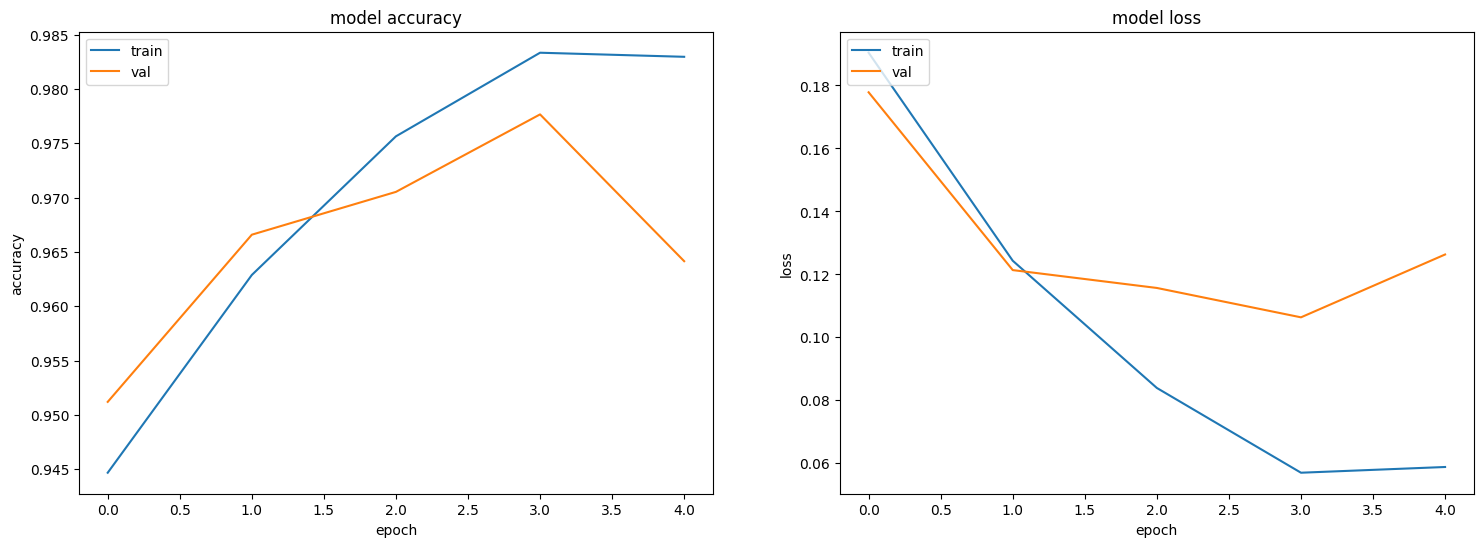

In [35]:
# Plot the result
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

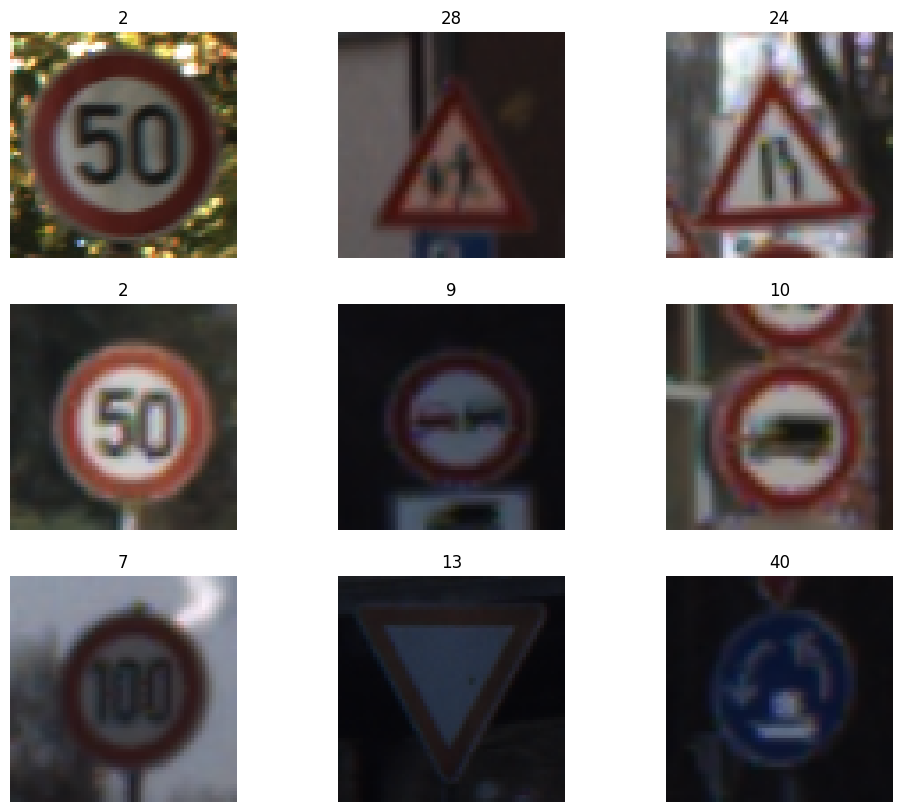

In [48]:
# Samples results
plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(testSamples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(testSamples[n])
    plt.title(testResults.argmax(axis=1)[n])
    plt.axis("off")

